<a href="https://colab.research.google.com/github/Dheepthi-Reddy/DheepthiReddy_INFO5731_Fall2024/blob/main/Vangeti_Dheepthi_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [1]:
# Write your code here

# importing necessary libraries
import numpy as np
import re                                                                       # library for regular expressions to clean or manipulate text
from sklearn.feature_extraction.text import TfidfVectorizer                     # library for converting text data to numeric form (TF-IDF features)
from sklearn.model_selection import train_test_split, cross_val_score, KFold    # library for splitting datasets into training and testing sets, and cross-validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   # evaluation metrics for classification
from sklearn.naive_bayes import MultinomialNB                                   # Naive Bayes classifier for text classification
from sklearn.svm import SVC                                                     # Support Vector Machine (SVM) for classification
from sklearn.neighbors import KNeighborsClassifier                              # k-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier                                 # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier                             # Random Forest classifier
from xgboost import XGBClassifier                                               # XGBoost classifier
from gensim.models import Word2Vec                                              # for training Word2Vec models to convert text to vector representations

In [2]:
# defined a function to load data from a file
def loadData(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = [line.strip().split(' ', 1) for line in file]
    labels, reviews = zip(*[(int(line[0]), line[1]) for line in data])
    return labels, reviews

# defined a function training and test data
train_labels, train_data = loadData('stsa-train.txt')
test_labels, test_data = loadData('stsa-test.txt')

# defined a function to clean text by removing special characters, digits, and converting to lowercase
def cleaningText(text):

    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

clean_train_data = [cleaningText(review) for review in train_data]          # cleaning the training data
clean_test_data = [cleaningText(review) for review in test_data]            # cleaning the test data

# defined a function to tokenize text into individual words
def tokenizingText(reviews):
    tokenizedReviews = [review.split() for review in reviews]
    return tokenizedReviews

tokenized_train_data = tokenizingText(clean_train_data)              # tokenizing the training data
tokenized_test_data = tokenizingText(clean_test_data)                # tokenizing the test data

# defined a function to build a vocabulary from tokenized reviews
def buildVocabulary(tokenizedReviews):
    vocabulary = set()
    for review in tokenizedReviews:
        vocabulary.update(review)
    return vocabulary

trainVocabulary = buildVocabulary(tokenized_train_data)              # building vocabulary for training data
testVocabulary = buildVocabulary(tokenized_test_data)                # building vocabulary for test data

# defined a function to encode the tokenized reviews into numerical representations
def encodeReviews(tokenizedReviews, vocabulary):
    wordIndex = {word: i for i, word in enumerate(vocabulary)}
    encodedReviews = [[wordIndex[word] for word in review if word in wordIndex] for review in tokenizedReviews]
    return encodedReviews

trainEncodedReviews = encodeReviews(tokenized_train_data, trainVocabulary)        # encoding training data
testEncodedReviews = encodeReviews(tokenized_test_data, testVocabulary)           # encoding test data

In [3]:
# splitting data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# defining a dictionary of the models to train and evaluate
models = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# for loop to train and evaluate each model
for model_name, model in models.items():

    print(f"Evaluating {model_name}:\n")

    tfidf_vectorizer = TfidfVectorizer()                              # to transform the text data into numerical features
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)           # fitting the vectorizer and transforming training data into TF-IDF features
    X_val_tfidf = tfidf_vectorizer.transform(X_val)                   # fitting the vectorizer and transforming validation data into TF-IDF features
    model.fit(X_train_tfidf, y_train)

    # performing 10-fold cross-validation to evaluate model performance
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_tfidf if model_name != "Word2Vec" else X_train_embeddings, y_train, cv=kfold, scoring='accuracy')
    print(f"Cross-Validation Accuracy Mean: {np.mean(cv_scores):.4f}, and Standard deviation: (±{np.std(cv_scores):.4f})\n")

    # evaluation on validation data
    y_pred = model.predict(X_val_tfidf)

    # Calculate metrics
    accuracyOfVal = accuracy_score(y_val, y_pred)
    precisionOfVal = precision_score(y_val, y_pred)
    recallOfVal = recall_score(y_val, y_pred)
    f1ScoreOfVal = f1_score(y_val, y_pred)

    # Print validation metrics
    print("Validation Metrics:\n")
    print(f"Accuracy    : {accuracyOfVal:.4f}")
    print(f"Precision   : {precisionOfVal:.4f}")
    print(f"Recall      : {recallOfVal:.4f}")
    print(f"F1 Score    : {f1ScoreOfVal:.4f}")
    print()

    # evaluation on test data
    print(f"Final Evaluation of {model_name} on Test Data:\n")
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    y_pred_test = model.predict(X_test_tfidf)

    # test metrics
    accuracyOfTest = accuracy_score(y_test, y_pred_test)
    precisionOfTest = precision_score(y_test, y_pred_test)
    recallOfTest = recall_score(y_test, y_pred_test)
    f1ScoreOfTest = f1_score(y_test, y_pred_test)


    print(f"Accuracy    : {accuracyOfTest:.4f}")
    print(f"Precision   : {precisionOfTest:.4f}")
    print(f"Recall      : {recallOfTest:.4f}")
    print(f"F1 Score    : {f1ScoreOfTest:.4f}")
    print()

Evaluating MultinomialNB:

Cross-Validation Accuracy Mean: 0.7719, and Standard deviation: (±0.0164)

Validation Metrics:

Accuracy    : 0.7762
Precision   : 0.7454
Recall      : 0.8534
F1 Score    : 0.7957

Final Evaluation of MultinomialNB on Test Data:

Accuracy    : 0.7832
Precision   : 0.7438
Recall      : 0.8836
F1 Score    : 0.8077

Evaluating SVM:

Cross-Validation Accuracy Mean: 0.7595, and Standard deviation: (±0.0111)

Validation Metrics:

Accuracy    : 0.7626
Precision   : 0.7529
Recall      : 0.7968
F1 Score    : 0.7742

Final Evaluation of SVM on Test Data:

Accuracy    : 0.7840
Precision   : 0.7601
Recall      : 0.8485
F1 Score    : 0.8019

Evaluating KNN:

Cross-Validation Accuracy Mean: 0.7005, and Standard deviation: (±0.0199)

Validation Metrics:

Accuracy    : 0.6968
Precision   : 0.6923
Recall      : 0.7314
F1 Score    : 0.7113

Final Evaluation of KNN on Test Data:

Accuracy    : 0.7117
Precision   : 0.7013
Recall      : 0.7672
F1 Score    : 0.7328

Evaluating Dec

In [4]:
from gensim.models import Word2Vec          # library for generating word embeddings using Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score    # for evaluating model performance
from xgboost import XGBClassifier           # for classification using XGBoost algorithm

# spliting data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# training Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
X_train_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train])
X_val_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_val])

# XGBoost model
xgb_model = XGBClassifier()

# XGBoost model
xgb_model.fit(X_train_embeddings, y_train)

# validation evaluation
y_pred = xgb_model.predict(X_val_embeddings)

# performance metrics calculation
accuracyOfVal = accuracy_score(y_val, y_pred)
precisionOfVal = precision_score(y_val, y_pred)
recallOfVal = recall_score(y_val, y_pred)
f1ScoreOfVal = f1_score(y_val, y_pred)

print("Evaluating Word2Vec Validation Metrics:\n")
print(f"Accuracy    : {accuracyOfVal:.4f}")
print(f"Precision   : {precisionOfVal:.4f}")
print(f"Recall      : {recallOfVal:.4f}")
print(f"F1 Score    : {f1ScoreOfVal:.4f}")
print()

# evaluation on test data
X_test_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test])
y_pred_test = xgb_model.predict(X_test_embeddings)

# calculating test metrics
accuracyOfTest = accuracy_score(y_test, y_pred_test)
precisionOfTest = precision_score(y_test, y_pred_test)
recallOfTest = recall_score(y_test, y_pred_test)
f1ScoreOfTest = f1_score(y_test, y_pred_test)

print("Final Evaluation of Word2Vec on Test Data:\n")
print(f"Accuracy    : {accuracyOfTest:.4f}")
print(f"Precision   : {precisionOfTest:.4f}")
print(f"Recall      : {recallOfTest:.4f}")
print(f"F1 Score    : {f1ScoreOfTest:.4f}")
print()

Evaluating Word2Vec Validation Metrics:

Accuracy    : 0.5208
Precision   : 0.5242
Recall      : 0.6696
F1 Score    : 0.5881

Final Evaluation of Word2Vec on Test Data:

Accuracy    : 0.5542
Precision   : 0.5525
Recall      : 0.7083
F1 Score    : 0.6208



In [5]:
# importing necessary libraries
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold    # libraries for splitting the data and cross-validation
from sklearn.linear_model import LogisticRegression                                       # library for training a Logistic Regression classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch                                      # PyTorch library for handling tensor operations
from tqdm import tqdm

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to generate BERT embeddings
def generateBERTEmbeddings(texts):
    embeddings = []
    for text in tqdm(texts):
        # Tokenize text and convert to PyTorch tensors
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        outputs = bert_model(**inputs)
        # Use [CLS] token representation as embedding
        cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
        embeddings.append(cls_embedding)
    return np.vstack(embeddings)

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
# splitting X_train into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# generating BERT embeddings for train, validation, and test sets
X_train_embeddings = generateBERTEmbeddings(X_train)
X_val_embeddings = generateBERTEmbeddings(X_val)
X_test_embeddings = generateBERTEmbeddings(X_test)

# training a Logistic Regression model using BERT embeddings
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embeddings, y_train)

# validation evaluation
y_val_pred = clf.predict(X_val_embeddings)

# calculating metrics for validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Evaluating BERT Validation Metrics:\n")
print(f"Accuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1 Score    : {f1:.4f}")

# evaluation on test data
y_test_pred = clf.predict(X_test_embeddings)

# calculating metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Final Evaluation of BERT on Test Data:\n")
print(f"Accuracy    : {accuracy_test:.4f}")
print(f"Precision   : {precision_test:.4f}")
print(f"Recall      : {recall_test:.4f}")
print(f"F1 Score    : {f1_test:.4f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 1384/1384 [03:57<00:00,  5.84it/s]


Evaluating BERT Validation Metrics:

Accuracy    : 0.8529
Precision   : 0.8517
Recall      : 0.8622
F1 Score    : 0.8569
Final Evaluation of BERT on Test Data:

Accuracy    : 0.8591
Precision   : 0.8617
Recall      : 0.8654
F1 Score    : 0.8635


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [6]:
# Write your code here
!pip install pandas numpy scikit-learn nltk gensim transformers sentence-transformers

In [7]:
# importing necessary libraries
import numpy as np
import pandas as pd
from gensim.models import Word2Vec                                      # library for training Word2Vec models
from sklearn.feature_extraction.text import TfidfVectorizer             # library for converting text to numerical features (TF-IDF)
from sklearn.cluster import KMeans, DBSCAN                              # library for clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster, inconsistent     # library for hierarchical clustering methods
from sklearn.metrics import silhouette_score                            # library for evaluating performance of clustering
from transformers import BertTokenizer, BertModel                       # library for BERT model
from torch.utils.data import DataLoader, TensorDataset                  # library for handling PyTorch datasets
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA                                   # library for dimensionality reduction
from sklearn.preprocessing import LabelEncoder                          # library for encoding categorical labels to numeric labels


# defined a function to load the dataset
def loadReviewsData(file_path, sample_size=1000, random_state=42):
    data = pd.read_csv(file_path)
    sample_data = data.sample(n=sample_size, random_state=random_state)
    return sample_data

# defined a function to preprocess reviews data and convert into a TF-IDF matrix
def preprocessData(data):
    data['Reviews'].fillna('', inplace=True)
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(data['Reviews'])
    return X

# defined a function to apply K-means clustering to the TF-IDF matrix
def kMeansClustering(X, num_clusters, random_state=42):
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    labels = kmeans.fit_predict(X)
    return labels

# defined a function to apply DBSCAN clustering to the matrix
def dbscanClustering(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# defined a function to apply hierarchical clustering on the matrix
def hierarchicalClustering(X):
    Z = linkage(X.toarray(), method='ward')
    depth = 5
    inconsistentValues = inconsistent(Z, depth)
    threshold = inconsistentValues[-1, 3]
    hierarchicalLabels = fcluster(Z, threshold, criterion='distance')
    return hierarchicalLabels

# defined a function to get the word vectors by averaging the word embeddings in a review
def wordVectors(model, words):
    word_vectors = []
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# defined a function to train a Word2Vec model on the reviews
def word2vecModel(reviews):
    model = Word2Vec(reviews.apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)
    model.train(reviews.apply(lambda x: x.split()), total_examples=model.corpus_count, epochs=model.epochs)
    return model

# defined a function to extract word vectors for each review using the trained Word2Vec model
def extractWordVectors(model, reviews):
    # Use the defined get_word_vectors function to infer word vectors for each review
    word_vectors = np.array([wordVectors(model, text.split()) for text in reviews])
    return word_vectors

# defined a function to extract BERT embeddings for each review
def bertEmbeddings(reviews):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    inputs = tokenizer(reviews.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=128)
    dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
    dataloader = DataLoader(dataset, batch_size=32)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    embeddings = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy())
    bert_embeddings = np.concatenate(embeddings, axis=0)
    return bert_embeddings

# defined a function to evaluate the clustering performance using silhouette score
def evaluateSilhouette(X, labels):
    silhouette = silhouette_score(X, labels)
    return silhouette

data = loadReviewsData('Amazon_Unlocked_Mobile.csv')

# preprocessing the data
X = preprocessData(data)

kmeans = kMeansClustering(X, num_clusters=5)                      # applying K-means clustering
dbscan = dbscanClustering(X)                                      # applying DBSCAN clustering
hierarchical = hierarchicalClustering(X)                          # applying hierarchical clustering
word2vec_model = word2vecModel(data['Reviews'])                         # training Word2Vec model
word_vectors = extractWordVectors(word2vec_model, data['Reviews'])      # extracting Word2Vec vectors
bert_embed = bertEmbeddings(data['Reviews'])                            # extracting BERT embeddings

# evaluating the clustering methods
kmeansSilhouette = evaluateSilhouette(X, kmeans)
dbscanSilhouette = evaluateSilhouette(X, dbscan)
hierarchicalSilhouette = evaluateSilhouette(X, hierarchical)
word2vecSilhouette = evaluateSilhouette(word_vectors, kmeans)
bertSilhouette = evaluateSilhouette(bert_embed, kmeans)

print("Silhouette score of K-means       :", kmeansSilhouette)
print("Silhouette score of DBSCAN        :", dbscanSilhouette)
print("Silhouette score of Hierarchical  :", hierarchicalSilhouette)
print("Silhouette score of Word2Vec      :", word2vecSilhouette)
print("Silhouette score of BERT          :", bertSilhouette)

<ipython-input-7-3824fc4ded2e>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Reviews'].fillna('', inplace=True)


Silhouette score of K-means       : 0.03228296469068228
Silhouette score of DBSCAN        : 0.013489617576506895
Silhouette score of Hierarchical  : 0.05349796119020714
Silhouette score of Word2Vec      : -0.088691205
Silhouette score of BERT          : 0.03825193


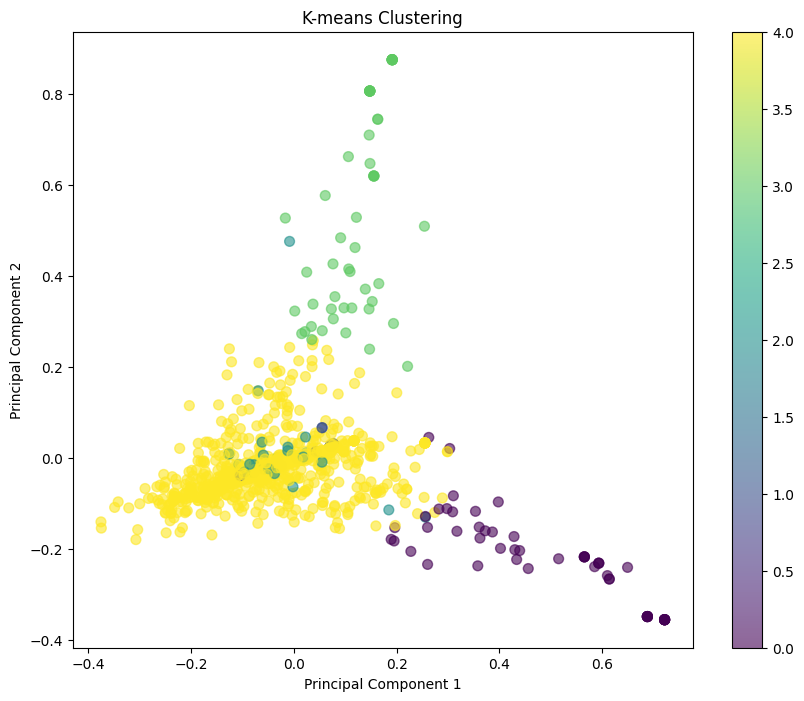

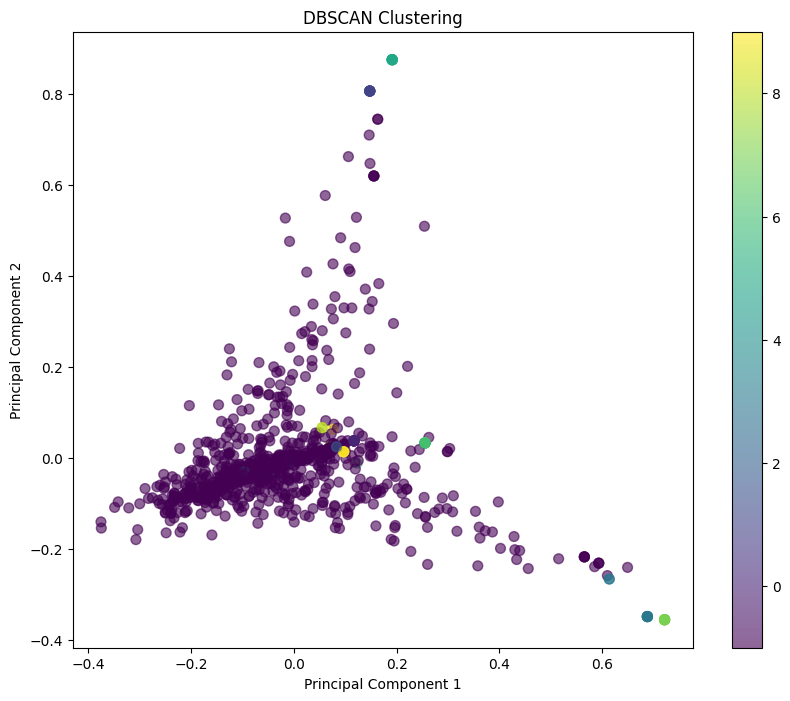

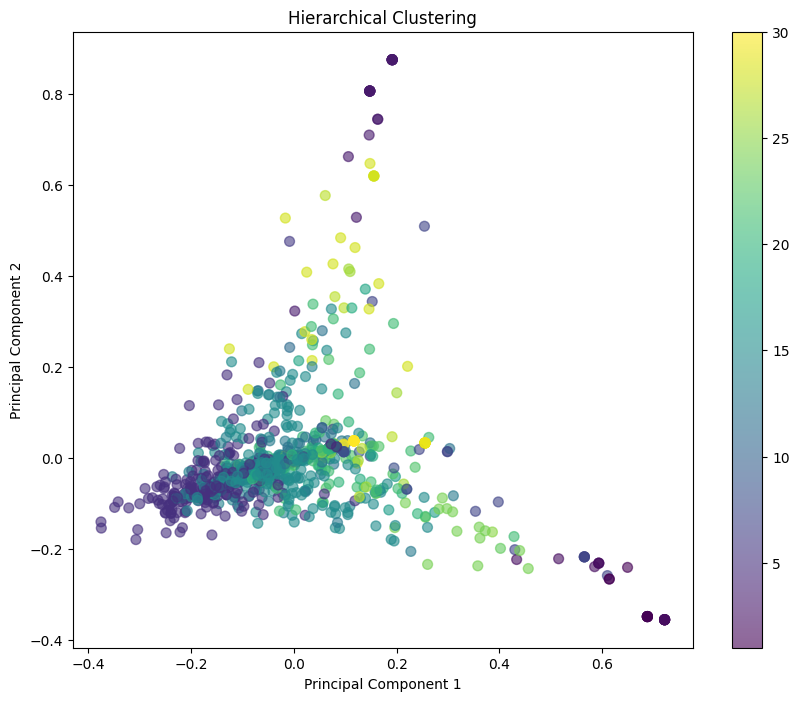

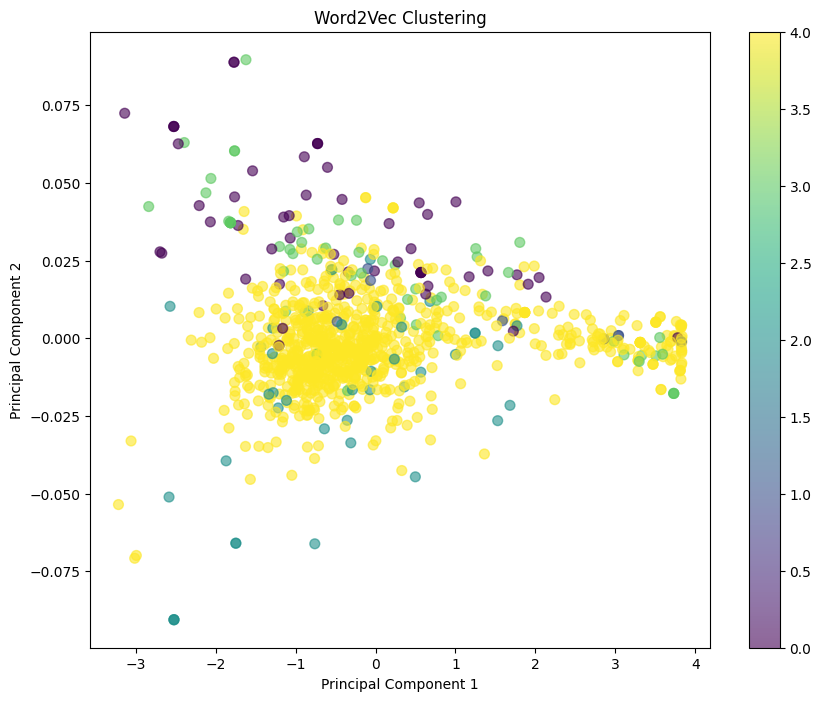

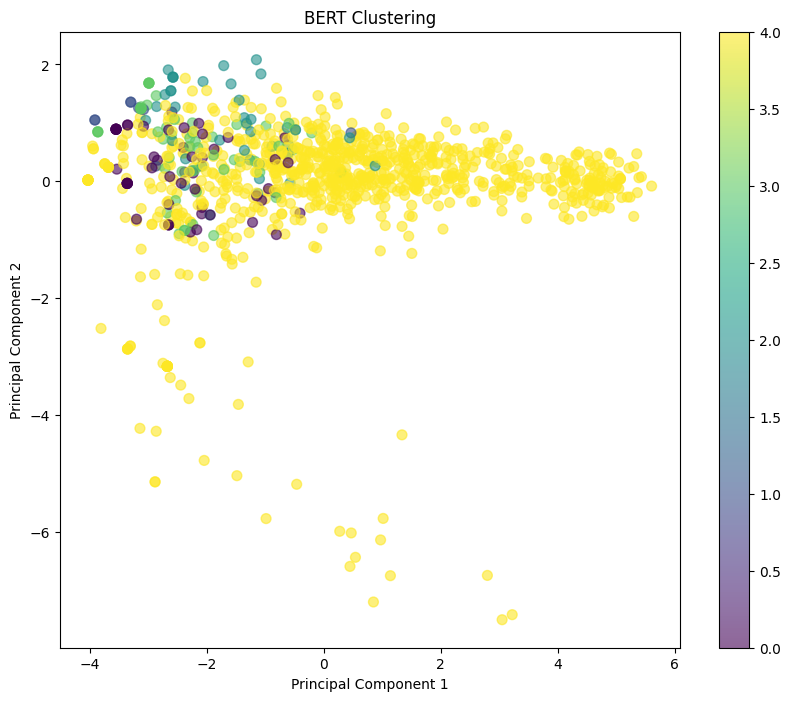

In [8]:
# defined a function to plot clusters after dimensionality reduction
def plotFunc(X, labels, title):

    pca = PCA(n_components=2)                      # dimensionality reduction to 2D using PCA
    reduced_data = pca.fit_transform(X.toarray())

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.colorbar(scatter)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# defined a  function to plot Word2Vec or BERT clusters
def plotEmbeddings(embeddings, labels, title):

    pca = PCA(n_components=2)                        # dimensionality reduction to 2D using PCA
    reduced_data = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.colorbar(scatter)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


plotFunc(X, kmeans, title='K-means Clustering')
plotFunc(X, dbscan, title='DBSCAN Clustering')
plotFunc(X, hierarchical, title='Hierarchical Clustering')
plotEmbeddings(word_vectors, kmeans, title='Word2Vec Clustering')
plotEmbeddings(bert_embed, kmeans, title='BERT Clustering')

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**


When comparing silhouette score of these clustering methods, hierarchical clustering ran the best with a silhouette score of 0.0535, showing a well defined clusters, even from the plot we can see that it has distinguished colors in scatter plot compared to others. K-means and DBSCAN have moderate scores of 0.0323 and 0.0135, showing weak clustering performance. BERT has a score of 0.0383 which is relatively low, Word2Vec has a negative score of -0.0811, means it has poor clustering.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [9]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

This assignment helped me in learning text classification and text clustering.
Word2Vec and BERT classifier took a lot of time to run and I felt it challenging to get the metrics of these two.



'''

'\nPlease write you answer here:\n\nThis assignment helped me in learning text classification and text clustering. Word2Vec and BERT classifier took a lot of time to run and I felt it challenging to get the metrics of these two.\n\n\n\n'